# Question 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from sympy import *
from IPython.display import display, Math
smp.init_printing()

## Part 1: Dealing with $\alpha$

In class we showed that

$$\alpha = \frac{q^2 \omega^2 N}{mc \epsilon_0} \sum_j \frac{f_j \gamma_j}{(\omega_j^2-\omega^2)^2+\gamma_j^2 \omega^2} $$

In the case of one natural frequency $\omega_1$ it follows that

$$\alpha = \frac{q^2 \omega^2 N}{mc \epsilon_0} \frac{f \gamma}{(\omega_1^2-\omega^2)^2+\gamma^2 \omega^2} $$

We will absorb all the constants into 1 big constant $A$ by defining 

$$ \alpha \equiv \frac{A \gamma}{(\omega_1^2-\omega^2)^2+\gamma^2 \omega^2}$$

The maximimum either occurs when $d\alpha/d\omega=0$ or as $\omega \to \pm \infty$. Since $\omega \to \infty$ send $\alpha \to 0$ the maximum must occur when the derivative is zero. Lets use sympy to solve for this value of $\omega$.

In [2]:
A, gam, w1, w = smp.symbols('A gamma omega_1 omega')

Define $\alpha$

In [3]:
alpha = A*gam/((w1**2-w**2)**2+gam**2*w**2)

Lets find the values of $\omega$ that make $\alpha$ maximum.

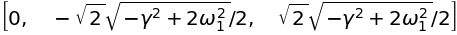

In [4]:
sols = solve(diff(alpha, w), w)
sols

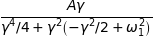

In [5]:
alpha.subs(w, sols[1])

All these give the same maximum value of:

$$\alpha_{max}=\frac{A \gamma}{\omega_1^2} $$

It follows that we need to solve for $\omega$ when 

$$\alpha=\alpha_{half}=\frac{A \gamma}{2\omega_1^2} $$

In [6]:
alpha_half = A*gam/(2*w1**2)
w_halfs = solve(alpha-alpha_half, w)

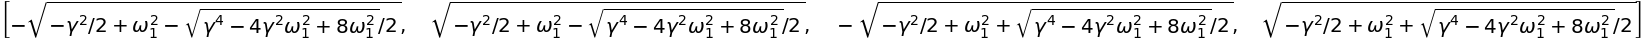

In [7]:
w_halfs

Of course, we're only really interested in the positive frequencies, but it is reassuring that for every positive solution there is also a negative one. Lets make sure they give the correct values.

In [8]:
display(alpha.subs(w, w_halfs[1]).simplify())
display(alpha.subs(w, w_halfs[3]).simplify())

Perfect.

## Part 2: Deal with n

In class we showed that

$$n=1+\frac{Nq^2}{2m\epsilon_0}\sum_j\frac{f_j(\omega_j^2-\omega^2)}{(\omega_j^2-\omega^2)^2+\gamma_j^2\omega^2} $$

In the case of one natural frequency $\omega_1$ it follows that

$$n=1+\frac{Nq^2}{2m\epsilon_0}\frac{f(\omega_1^2-\omega^2)}{(\omega_1^2-\omega^2)^2+\gamma^2\omega^2} $$

We can absorb all the constants into one big constant $A$ by defining

$$n \equiv 1+A\frac{\omega_1^2-\omega^2}{(\omega_1^2-\omega^2)^2+\gamma^2\omega^2} $$

Note that as $\omega \to \pm \infty$ then $n \to 1$. We can look for maximum and minimum values by considering the places where the derivative is zero.

In [9]:
n = 1+ A*(w1**2-w**2)/((w1**2-w**2)**2+gam**2*w**2)

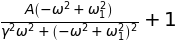

In [10]:
n

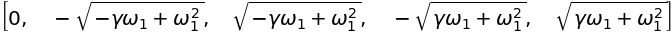

In [11]:
sols = solve(diff(n, w), w)
sols

Lets plug these all in and see what the results are. Note that the zero maxima corresponds to the limit where $\omega \to 0$; light of zero frequency is nothing at all.

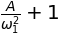

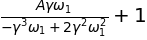

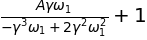

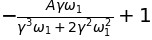

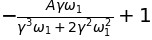

In [12]:
for sol in sols:
    display(n.subs(w, sol).expand())

These expressions can be simplified further and we see that there are three minima/maxima for $n$:

$$1+\frac{A}{\omega_1^2}$$

$$1+\frac{A}{\gamma(2\omega_1-\gamma)} $$

$$1-\frac{A}{\gamma(2\omega_1+\gamma)} $$

The first value is always greater than 1 and the third value is always less than one (so the minima and maxima are **atleast** at these points and not at $\omega=\pm \infty$). The value of the second value determines where the true minimum and maximum exist on the curve.

**Case 1**: If $\omega_1^2< \gamma(2\omega_1-\gamma)$ and $\gamma(2\omega_1-\gamma)>0$ then (i) is the maximum and (iii) is the minimum.

**Case 2**: If $0<\gamma(2\omega_1-\gamma)<\omega_1^2$ then (ii) is the maximum and (iii) is the minimum.

**Case 3**: If - $\gamma(2\omega_1+\gamma) < \gamma(2\omega_1-\gamma) < 0 $ then (i) is maximum and (ii) is minimum.